In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import json

In [18]:
with open('loss_metric.json', 'r') as f:
    data = json.load(f)

In [19]:
data.keys()

dict_keys(['softmax_listops_8762', 'softmax_listops_98548', 'softmax_listops_125', 'softmax_listops_3485', 'softmax_text_1234', 'softmax_text_8975', 'softmax_text_3517', 'softmax_text_986', 'softmax_retrieval_4096', 'softmax_listops_98548_multigauss:True', 'softmax_listops_125_multigauss:True', 'softmax_listops_8762_multigauss:True', 'softmax_text_1234_multigauss:True', 'softmax_text_8975_multigauss:True', 'softmax_text_1234_multigauss:True_RBF', 'softmax_listops_8762_multigauss:True_RBF', 'softmax_listops_98548_multigauss:True_RBF', 'softmax_listops_98548_multigauss:True_RBF_mu2: 0.5', 'softmax_text_1234_multigauss:True_RBF_mu2: 0.5', 'softmax_text_1234_multigauss:True_RBF_mu2: -0.5', 'softmax_listops_98548_multigauss:True_RBF_mu2: -0.5'])

In [5]:
# files_384 = [data_files_384_7412_softmax, data_files_384_81265_softmax,data_files_384_3254_softmax, data_files_384_9853_softmax]

In [26]:
def plot_error_bar_softmax(data, files):
    loss_train, loss_val, acc_train, acc_val = [], [], [], []
    for f in files:
        _data = data[f]
        loss_train.append(_data['train_loss'][:100])
        loss_val.append(_data['val_loss'][:100])
        acc_train.append(_data['train_acc'][:100])
        acc_val.append(_data['val_acc'][:100])


    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    x = np.arange(100)
    ax[0, 0].errorbar(x, np.array(loss_train).mean(axis = 0), yerr=np.array(loss_train).std(axis = 0), fmt='o', color='black',
                ecolor='lightgray', elinewidth=3, capsize=0)  
    ax[0, 0].set_title(f'gauss_train_loss')
    ax[0, 0].legend()
    
    ax[0, 1].errorbar(x, np.array(loss_val).mean(axis = 0), yerr=np.array(loss_val).std(axis = 0), fmt='o', color='black',
                ecolor='lightgray', elinewidth=3, capsize=0)
    ax[0, 1].set_title(f'gauss_val_loss')
    ax[0, 1].legend()

    ax[1, 0].errorbar(x, np.array(acc_train).mean(axis = 0), yerr=np.array(acc_train).std(axis = 0), fmt='o', color='black',
                ecolor='lightgray', elinewidth=3, capsize=0)
    ax[1, 0].set_title(f'gauss_train_acc')
    ax[1, 0].legend()

    ax[1, 1].errorbar(x, np.array(acc_val).mean(axis = 0), yerr=np.array(acc_val).std(axis = 0), fmt='o', color='black',
                ecolor='lightgray', elinewidth=3, capsize=0)
    ax[1, 1].set_title(f'gauss_val_acc')
    ax[1, 1].legend()

In [21]:
def plot_metrics(gauss_file, softmax_file, task_name, seed):
    gauss_data, softmax_data = data[gauss_file], data[softmax_file]
    
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    n = len(softmax_data['train_loss'])
    x = np.arange(len(softmax_data['train_loss']))
    ax[0, 0].plot(x, gauss_data['train_loss'][:n], label='gauss_train_loss')
    ax[0, 0].plot(x, softmax_data['train_loss'], label='softmax_train_loss')
    ax[0, 0].set_title(f'task_{task_name}_seed_{seed}_train_loss')
    ax[0, 0].legend()

    ax[0, 1].plot(x, gauss_data['val_loss'][:n], label='gauss_val_loss')
    ax[0, 1].plot(x, softmax_data['val_loss'], label='softmax_val_loss')
    ax[0, 1].set_title(f'task_{task_name}_seed_{seed}_val_loss')
    ax[0, 1].legend()
    
    ax[1, 0].plot(x, gauss_data['train_acc'][:n], label='gauss_train_acc')
    ax[1, 0].plot(x, softmax_data['train_acc'], label='softmax_train_acc')
    ax[1, 0].set_title(f'task_{task_name}_seed_{seed}_train_accuracy')
    ax[1, 0].legend()

    ax[1, 1].plot(x, gauss_data['val_acc'][:n], label='gauss_val_acc')
    ax[1, 1].plot(x, softmax_data['val_acc'], label='softmax_val_acc')
    ax[1, 1].set_title(f'task_{task_name}_seed_{seed}_val_accuracy')
    ax[1, 1].legend()


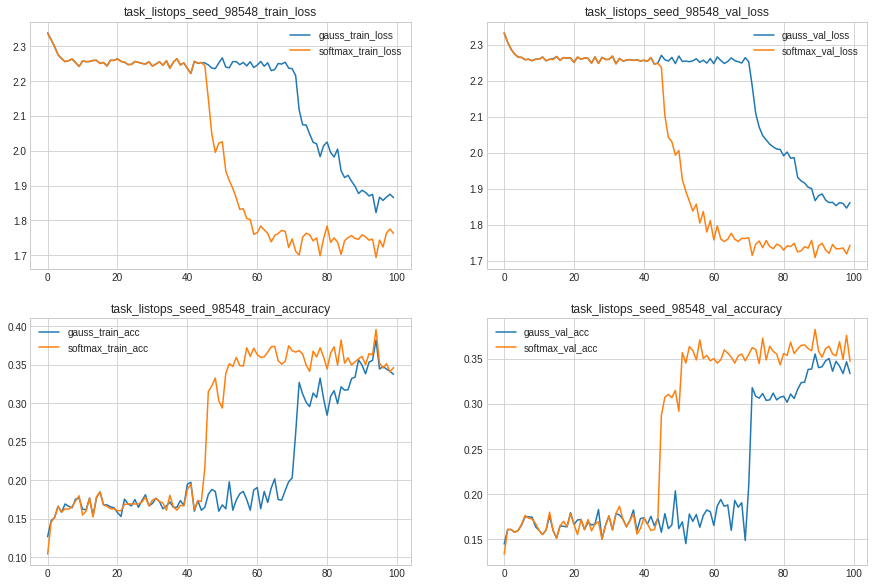

In [10]:
plot_metrics('softmax_listops_98548_multigauss:True', 'softmax_listops_98548', 'listops', 98548)

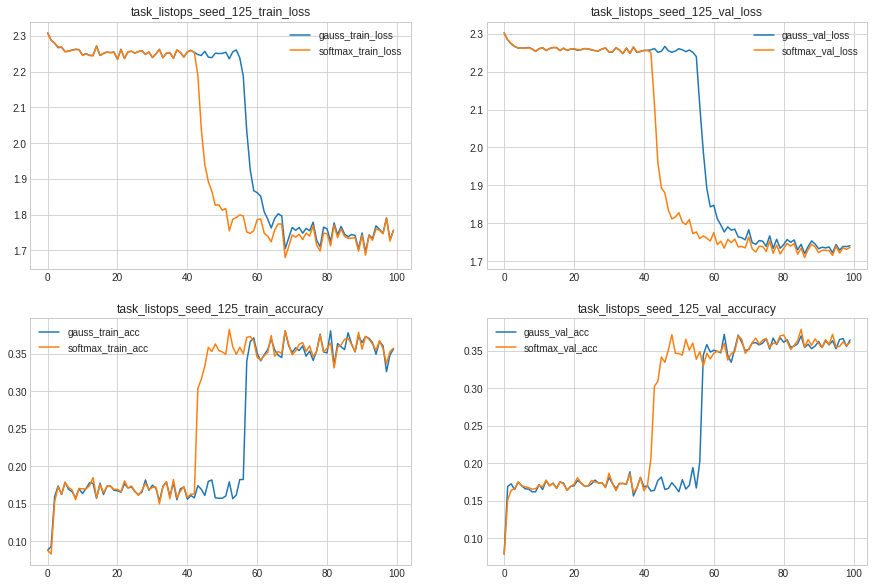

In [22]:
plot_metrics('softmax_listops_125_multigauss:True', 'softmax_listops_125', 'listops', 125)

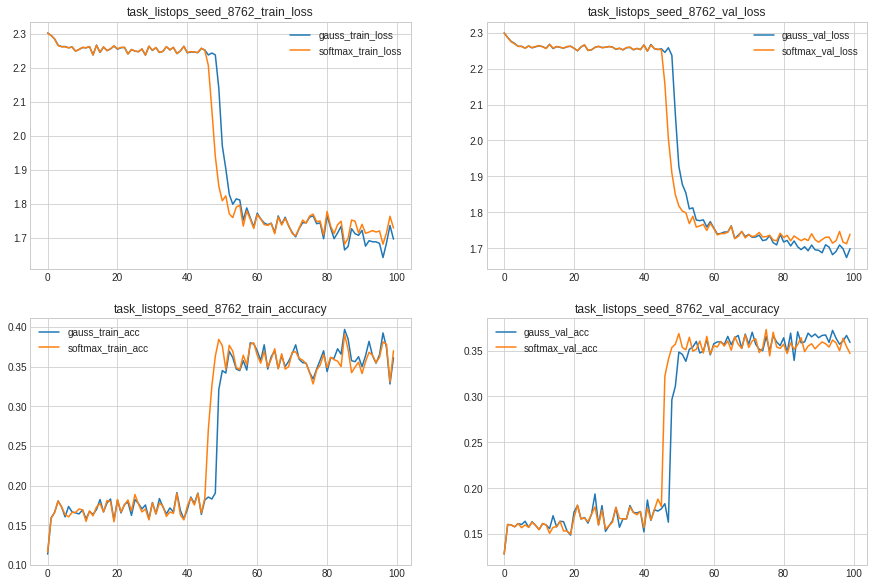

In [11]:
plot_metrics('softmax_listops_8762_multigauss:True', 'softmax_listops_8762', 'listops', 8762)

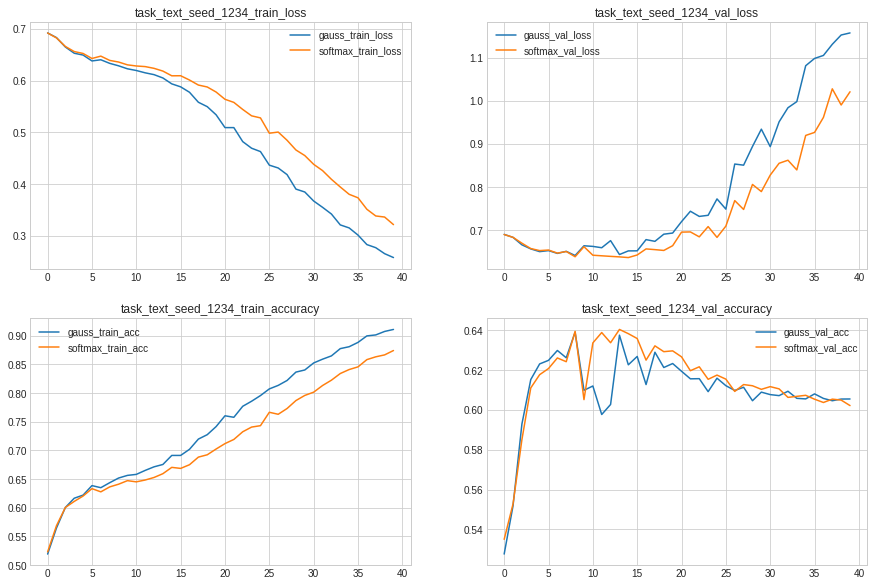

In [13]:
plot_metrics('softmax_text_1234_multigauss:True', 'softmax_text_1234', 'text', 1234)

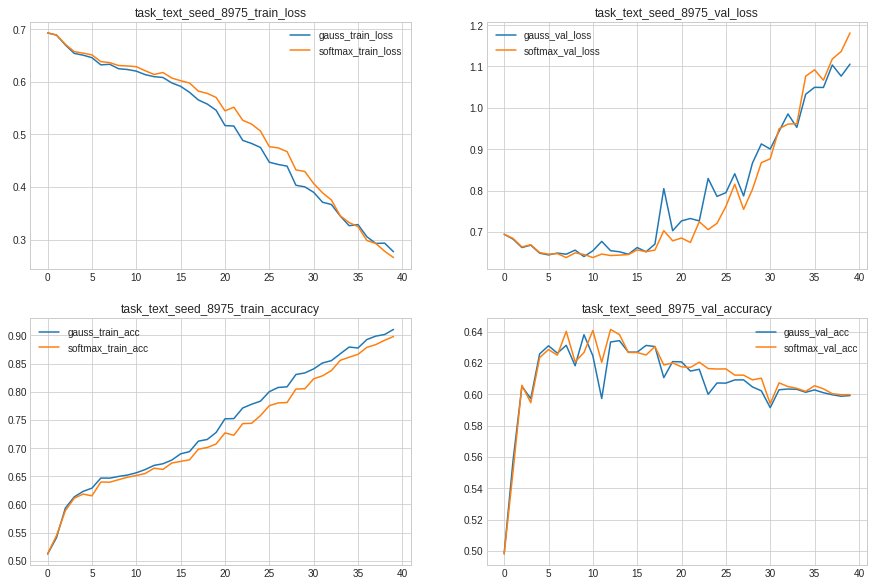

In [14]:
plot_metrics('softmax_text_8975_multigauss:True', 'softmax_text_8975', 'text', 8975)

In [15]:
### ATTENTION PLOT